In [1]:
from mpl_toolkits.basemap import Basemap
import netCDF4
from pylab import *
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from datetime import datetime
import math as math
%matplotlib inline

In [2]:
url='http://milas.marine.ie/thredds/dodsC/IMI_ROMS_HYDRO/AGGREGATE'
nc=netCDF4.Dataset(url,fillval=np.nan)
var_name='sea_surface_height'
print nc.variables.keys()
tstr='IMI_ROMS_HYDRO/AGGREGATE'

[u'latitude', u'longitude', u'time', u'sea_surface_temperature', u'sea_bottom_temperature', u'sea_surface_salinity', u'sea_bottom_salinity', u'sea_surface_x_velocity', u'sea_surface_y_velocity', u'sea_bottom_x_velocity', u'sea_bottom_y_velocity', u'mixed_layer_depth', u'sea_surface_height']


In [3]:
lon=nc.variables['longitude']
lond=lon[:]
print np.nanmin(lond), np.max(lond)

lat=nc.variables['latitude']
latd=lat[:]
print np.nanmin(latd), np.max(latd)

lo,la =np.meshgrid(lond,latd)

latmn = np.mean(lat)

-17.99375 -1.00625
48.00625 57.99375


In [4]:
print nc

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format UNDEFINED):
    dimensions(sizes): latitude(800), longitude(1360), time(265)
    variables(dimensions): float64 latitude(latitude), float64 longitude(longitude), float64 time(time), float64 sea_surface_temperature(time,latitude,longitude), float64 sea_bottom_temperature(time,latitude,longitude), float64 sea_surface_salinity(time,latitude,longitude), float64 sea_bottom_salinity(time,latitude,longitude), float64 sea_surface_x_velocity(time,latitude,longitude), float64 sea_surface_y_velocity(time,latitude,longitude), float64 sea_bottom_x_velocity(time,latitude,longitude), float64 sea_bottom_y_velocity(time,latitude,longitude), float64 mixed_layer_depth(time,latitude,longitude), float64 sea_surface_height(time,latitude,longitude)
    groups: 



In [8]:
tidx=100
time=nc.variables['time']
print time.shape
dtime = netCDF4.num2date(time[tidx],time.units)
datestr = dtime.strftime('%Y-%b-%d %H:%M')
print datestr

(265,)
2016-Mar-18 03:59


In [9]:
var=nc.variables[var_name]
var_d=var[tidx,:,:]
var_d = ma.array(var_d,mask=var_d==var.FillValue_)
vmin=np.nanmin(var_d)
vmax=np.nanmax(var_d)

# This min/max calc won't work in general, but is OK for data relatively well distributed about 0
#vminmax=math.ceil(2*max(abs(vmin),abs(vmax)))/2
vminmax=5
print vmin,vmax,vminmax

-0.715617874462 2.6688439529 5


/opt/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/opt/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


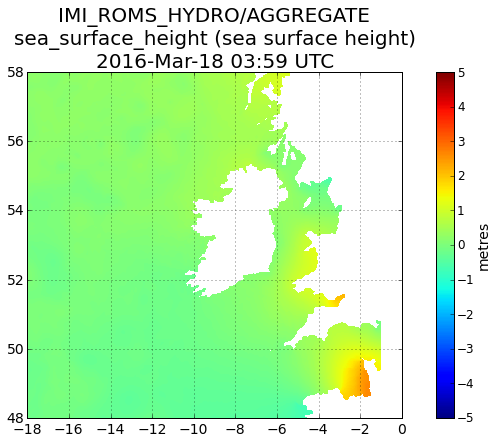

In [10]:
fig = plt.figure(figsize=(12,6), dpi=144)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_aspect(1.0/np.cos(latmn * np.pi / 180.0))

pc=pcolor(lond, latd, var_d, cmap=plt.cm.jet, vmin=-vminmax, vmax=vminmax)
plt.title("%s\n%s (%s)\n%s UTC" % (tstr, var_name, var.long_name, datestr), fontsize=20)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=14)

cbax = fig.add_axes() 
cb = plt.colorbar(pc, cax=cbax,  orientation='vertical')
cb.set_label(var.units, fontsize=14)
cb.ax.tick_params(axis='both', which='major', labelsize=12)


In [9]:
llcrnrlon=floor(np.min(lond))  # lower-left corner, lon
llcrnrlat=floor(np.min(latd))  # lower-left corner, lat
urcrnrlon=ceil(np.max(lond))   # upper-right corner, lon
urcrnrlat=ceil(np.max(latd))   # upper-right corner, lat
lon_0    =np.mean(lond)        # center of desired map domain (in degrees).
lat_1    =np.mean(latd)        # first standard parallel for lambert conformal
dl=10
dlon=urcrnrlon-llcrnrlon
dlat=urcrnrlat-llcrnrlat

print np.floor(llcrnrlon), dlon,dlat

-18.0 16.0 11.0


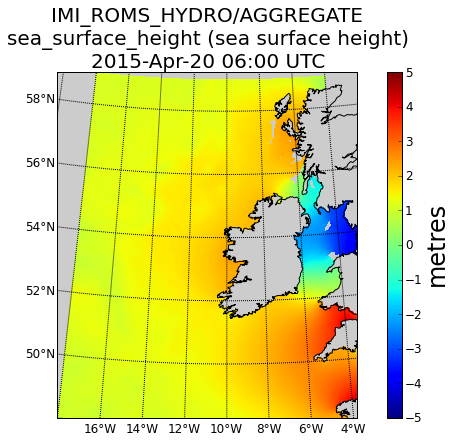

In [17]:
fig = plt.figure(figsize=(12,6), dpi=144)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

#m = Basemap(projection='kav7',lon_0=-80,resolution='l')

m = Basemap(llcrnrlon=llcrnrlon,
            llcrnrlat=llcrnrlat,
            urcrnrlon=urcrnrlon,
            urcrnrlat=urcrnrlat,
            projection='lcc',
            resolution ='i',
            area_thresh=1000.,
            lat_1=lat_1,
            lon_0=lon_0)
 
m.drawmapboundary(fill_color='0.8')
m.drawcoastlines(linewidth=1.)
#m.fillcontinents(color='0.8')
m.drawparallels(np.arange(46,60,2),labels=[1,0,1,0],fontsize=12)
m.drawmeridians(np.arange(-20,0,2),labels=[0,0,0,1],fontsize=12)

pc=m.pcolor(lo, la, var_d, cmap=plt.cm.jet, vmin=-vminmax, vmax=vminmax, latlon=True)

cb = m.colorbar(pc,"right", size="5%", pad="10%")
cb.set_label(var.units, fontsize=24)
cb.ax.tick_params(axis='both', which='major', labelsize=12)

ax.set_title("%s\n%s (%s)\n%s UTC" % (tstr, var_name, var.long_name, datestr), fontsize=20)